# Sistem Rekomendasi

In [1]:
import numpy as np
import pandas as pd
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Load Data

In [2]:
anime = pd.read_csv('https://raw.githubusercontent.com/dwisandikalla/sistem-rekomendasi/refs/heads/main/anime.csv')
anime

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266
...,...,...,...,...,...,...,...
12289,9316,Toushindai My Lover: Minami tai Mecha-Minami,Hentai,OVA,1,4.15,211
12290,5543,Under World,Hentai,OVA,1,4.28,183
12291,5621,Violence Gekiga David no Hoshi,Hentai,OVA,4,4.88,219
12292,6133,Violence Gekiga Shin David no Hoshi: Inma Dens...,Hentai,OVA,1,4.98,175


In [3]:
rating = pd.read_csv('https://raw.githubusercontent.com/dwisandikalla/sistem-rekomendasi/refs/heads/main/rating.csv')
rating

,user_id,anime_id,rating
0,1,20,-1
1,1,24,-1
2,1,79,-1
3,1,226,-1
4,1,241,-1
...,...,...,...
7813732,73515,16512,7
7813733,73515,17187,9
7813734,73515,22145,10
7813735,73516,790,9


## Univariate EDA

Mengecek info untuk rating dan anime

In [4]:
anime.info()
print('\n')
rating.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12294 entries, 0 to 12293
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   anime_id  12294 non-null  int64  
 1   name      12294 non-null  object 
 2   genre     12232 non-null  object 
 3   type      12269 non-null  object 
 4   episodes  12294 non-null  object 
 5   rating    12064 non-null  float64
 6   members   12294 non-null  int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 672.5+ KB


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7813737 entries, 0 to 7813736
Data columns (total 3 columns):
 #   Column    Dtype
---  ------    -----
 0   user_id   int64
 1   anime_id  int64
 2   rating    int64
dtypes: int64(3)
memory usage: 178.8 MB


Mengecek nilai unik di anime dan missing  value

In [5]:
print('Nilai unik data anime: ')
display(anime.nunique(),'\n')
print('Missing value anime: ')
display(anime.isnull().sum(), '\n')
print('Missing value rating: ')
display(rating.isnull().sum())

Nilai unik data anime: 


,0
anime_id,12294
name,12292
genre,3264
type,6
episodes,187
rating,598
members,6706


'\n'

Missing value anime: 


,0
anime_id,0
name,0
genre,62
type,25
episodes,0
rating,230
members,0


'\n'

Missing value rating: 


,0
user_id,0
anime_id,0
rating,0


In [6]:
print('Macam genre: ', anime.genre.unique())
print('Macam type: ', anime.type.unique())

Macam genre:  ['Drama, Romance, School, Supernatural'
 'Action, Adventure, Drama, Fantasy, Magic, Military, Shounen'
 'Action, Comedy, Historical, Parody, Samurai, Sci-Fi, Shounen' ...
 'Hentai, Sports' 'Drama, Romance, School, Yuri' 'Hentai, Slice of Life']
Macam type:  ['Movie' 'TV' 'OVA' 'Special' 'Music' 'ONA' nan]


Statistika deskriptif

In [7]:
print('Statistika deskriptif anime: ')
display(anime.describe(include='all'), '\n')
print('\n Statistika deskriptif rating: ')
display(rating.describe(include='all'))

Statistika deskriptif anime: 


,anime_id,name,genre,type,episodes,rating,members
count,12294.000000,12294,12232,12269,12294,12064.000000,1.229400e+04
unique,NaN,12292,3264,6,187,NaN,NaN
top,NaN,Saru Kani Gassen,Hentai,TV,1,NaN,NaN
freq,NaN,2,823,3787,5677,NaN,NaN
mean,14058.221653,NaN,NaN,NaN,NaN,6.473902,1.807134e+04
std,11455.294701,NaN,NaN,NaN,NaN,1.026746,5.482068e+04
min,1.000000,NaN,NaN,NaN,NaN,1.670000,5.000000e+00
25%,3484.250000,NaN,NaN,NaN,NaN,5.880000,2.250000e+02
50%,10260.500000,NaN,NaN,NaN,NaN,6.570000,1.550000e+03
75%,24794.500000,NaN,NaN,NaN,NaN,7.180000,9.437000e+03


'\n'


 Statistika deskriptif rating: 


,user_id,anime_id,rating
count,7.813737e+06,7.813737e+06,7.813737e+06
mean,3.672796e+04,8.909072e+03,6.144030e+00
std,2.099795e+04,8.883950e+03,3.727800e+00
min,1.000000e+00,1.000000e+00,-1.000000e+00
25%,1.897400e+04,1.240000e+03,6.000000e+00
50%,3.679100e+04,6.213000e+03,7.000000e+00
75%,5.475700e+04,1.409300e+04,9.000000e+00
max,7.351600e+04,3.451900e+04,1.000000e+01


Visualisasi distribusi rating (skala pengguna)

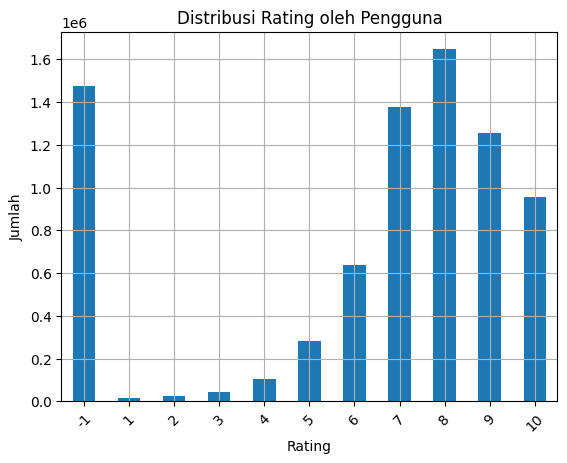

In [8]:
rating['rating'].value_counts().sort_index().plot(kind='bar', title='Distribusi Rating oleh Pengguna')
plt.xlabel('Rating')
plt.ylabel('Jumlah')
plt.xticks(rotation=45)
plt.grid()
plt.show()

Visualisasi distribusi rating rata-rata per anime

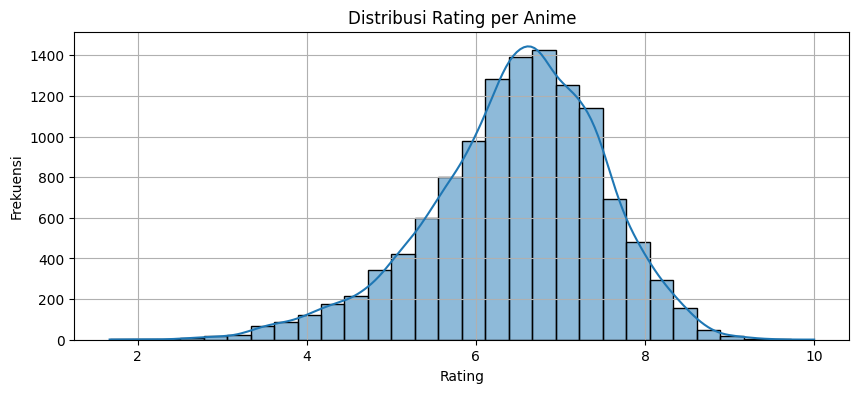

In [9]:
plt.figure(figsize=(10, 4))
sns.histplot(anime['rating'].dropna(), kde=True, bins=30)
plt.title('Distribusi Rating per Anime')
plt.xlabel('Rating')
plt.ylabel('Frekuensi')
plt.grid()
plt.show()

Genre Terbanyak

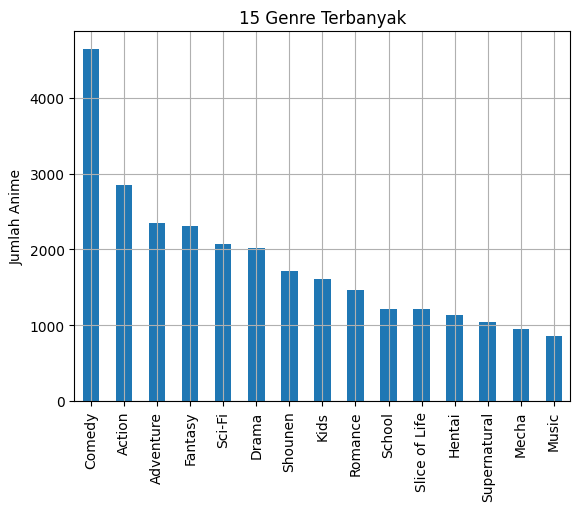

In [10]:
from collections import Counter
genre_list = anime['genre'].dropna().str.split(', ')
genre_flat = [genre for sublist in genre_list for genre in sublist]
genre_counts = pd.Series(Counter(genre_flat)).sort_values(ascending=False)
genre_counts.head(15).plot(kind='bar', title='15 Genre Terbanyak')
plt.ylabel('Jumlah Anime')
plt.grid()
plt.show()

Type Anime

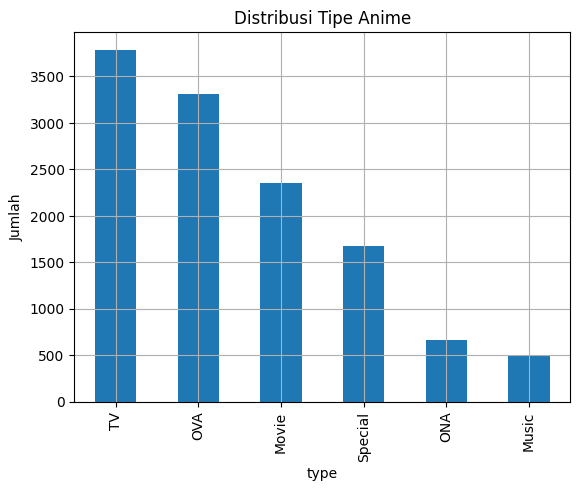

In [11]:
anime['type'].value_counts().plot(kind='bar', title='Distribusi Tipe Anime')
plt.ylabel('Jumlah')
plt.grid()
plt.show()

## Data Preprocessing

In [12]:
anime.drop_duplicates(inplace=True)

Menghapus missing value

In [13]:
anime = anime.dropna()

In [14]:
anime.reset_index(drop=True, inplace=True)

Menghapus rating -1

In [15]:
rating = rating[rating['rating'] != -1]

Drop Duplikasi

In [16]:
rating.drop_duplicates(inplace=True)

<ipython-input-16-e00a54dc0b73>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rating.drop_duplicates(inplace=True)


In [17]:
rating.reset_index(drop=True, inplace=True)

In [18]:
# Pastikan hanya anime yang tersedia di data anime
rating = rating[rating['anime_id'].isin(anime['anime_id'])]

In [19]:
# Contoh: 10 rating per anime, jika memungkinkan
rating_per_anime = rating.groupby('anime_id').apply(lambda x: x.sample(min(len(x), 100), random_state=42)).reset_index(drop=True)

<ipython-input-19-90ee299dd8c2>:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  rating_per_anime = rating.groupby('anime_id').apply(lambda x: x.sample(min(len(x), 100), random_state=42)).reset_index(drop=True)


In [20]:
# Merge dataset anime dan rating
anime_rating = pd.merge(rating_per_anime, anime, on='anime_id')

# Final check dimensi
print("anime.shape:", anime.shape)
print("rating.shape:", rating.shape)
print("anime_rating.shape:", anime_rating.shape)

anime.shape: (12017, 7)
rating.shape: (6337145, 3)
anime_rating.shape: (551796, 9)


In [21]:
anime_rating.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 551796 entries, 0 to 551795
Data columns (total 9 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   user_id   551796 non-null  int64  
 1   anime_id  551796 non-null  int64  
 2   rating_x  551796 non-null  int64  
 3   name      551796 non-null  object 
 4   genre     551796 non-null  object 
 5   type      551796 non-null  object 
 6   episodes  551796 non-null  object 
 7   rating_y  551796 non-null  float64
 8   members   551796 non-null  int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 37.9+ MB


In [22]:
anime_rating.isnull().sum()

,0
user_id,0
anime_id,0
rating_x,0
name,0
genre,0
type,0
episodes,0
rating_y,0
members,0


In [23]:
anime_rating.head()

,user_id,anime_id,rating_x,name,genre,type,episodes,rating_y,members
0,57246,1,7,Cowboy Bebop,"Action, Adventure, Comedy, Drama, Sci-Fi, Space",TV,26,8.82,486824
1,72249,1,5,Cowboy Bebop,"Action, Adventure, Comedy, Drama, Sci-Fi, Space",TV,26,8.82,486824
2,32726,1,9,Cowboy Bebop,"Action, Adventure, Comedy, Drama, Sci-Fi, Space",TV,26,8.82,486824
3,37978,1,8,Cowboy Bebop,"Action, Adventure, Comedy, Drama, Sci-Fi, Space",TV,26,8.82,486824
4,5694,1,10,Cowboy Bebop,"Action, Adventure, Comedy, Drama, Sci-Fi, Space",TV,26,8.82,486824


## Content Based Filtering

In [24]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

Ambil data yang diperlukan

In [25]:
data = anime_rating[['anime_id', 'name', 'genre']].drop_duplicates()
data['genre'] = data['genre'].fillna('')

TF-IDF Vectorizer

In [26]:
tfidf = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf.fit_transform(data['genre'])

Hitung cosine similarity

In [27]:
cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)
cosine_sim_df = pd.DataFrame(cosine_sim, index=data['name'], columns=data['name'])

Fungsi rekomendasi

In [28]:
def anime_recommendations(nama_anime, similarity_data=cosine_sim_df, items=data[['name', 'genre']], k=5):
    index = similarity_data.loc[:, nama_anime].to_numpy().argpartition(range(-1, -k-1, -1))
    closest = similarity_data.columns[index[-1:-(k+2):-1]]
    closest = closest.drop(nama_anime, errors='ignore')
    return pd.DataFrame(closest).merge(items).head(k)

Contoh

In [29]:
anime_recommendations('Naruto')

,name,genre
0,Boruto: Naruto the Movie - Naruto ga Hokage ni...,"Action, Comedy, Martial Arts, Shounen, Super P..."
1,Naruto Shippuuden: Sunny Side Battle,"Action, Comedy, Martial Arts, Shounen, Super P..."
2,Naruto x UT,"Action, Comedy, Martial Arts, Shounen, Super P..."
3,Naruto: Shippuuden Movie 4 - The Lost Tower,"Action, Comedy, Martial Arts, Shounen, Super P..."
4,Boruto: Naruto the Movie,"Action, Comedy, Martial Arts, Shounen, Super P..."


## Collaborative Filtering

In [30]:
import tensorflow as tf
from tensorflow.keras import layers, regularizers, Model
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from sklearn.model_selection import train_test_split

Memilih data yang akan digunakan

In [31]:
df = anime_rating[['user_id', 'anime_id', 'rating_x']].dropna()
df.rename(columns={'user_id': 'userID', 'anime_id': 'animeID'}, inplace=True)

Encoding user dan anime

In [32]:
user_ids = df['userID'].unique().tolist()
anime_ids = df['animeID'].unique().tolist()

user_to_encoded = {x: i for i, x in enumerate(user_ids)}
anime_to_encoded = {x: i for i, x in enumerate(anime_ids)}

df['user'] = df['userID'].map(user_to_encoded)
df['anime'] = df['animeID'].map(anime_to_encoded)

Normalisasi Rating

In [33]:
df['rating_x'] = df['rating_x'].astype('float32')
min_rating, max_rating = df['rating_x'].min(), df['rating_x'].max()
df['norm_rating'] = df['rating_x'].apply(lambda x: (x - min_rating) / (max_rating - min_rating))

Mengacak data

In [34]:
df = df.sample(frac=1, random_state=42)

Splitting data

In [35]:
x = df[['user', 'anime']].values
y = df['norm_rating'].values
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=0.2, random_state=42)

Model Collaborative filtering

In [36]:
class RecommenderNet(Model):
    def __init__(self, num_users, num_anime, embedding_size, **kwargs):
        super(RecommenderNet, self).__init__(**kwargs)
        self.user_embedding = layers.Embedding(num_users, embedding_size,
                                               embeddings_initializer='he_normal',
                                               embeddings_regularizer=regularizers.l2(5e-4))
        self.anime_embedding = layers.Embedding(num_anime, embedding_size,
                                                embeddings_initializer='he_normal',
                                                embeddings_regularizer=regularizers.l2(5e-4))
        self.user_bias = layers.Embedding(num_users, 1)
        self.anime_bias = layers.Embedding(num_anime, 1)

        # Tambahan Dense + Dropout layer
        self.dense1 = layers.Dense(64, activation='relu')
        self.dropout = layers.Dropout(0.5)
        self.output_layer = layers.Dense(1, activation='sigmoid')  # karena rating distandardisasi ke 0-1

    def call(self, inputs):
        user_vector = self.user_embedding(inputs[:, 0])
        anime_vector = self.anime_embedding(inputs[:, 1])
        user_bias = self.user_bias(inputs[:, 0])
        anime_bias = self.anime_bias(inputs[:, 1])

        dot_product = tf.reduce_sum(user_vector * anime_vector, axis=1, keepdims=True)
        x = dot_product + user_bias + anime_bias
        x = self.dense1(x)
        x = self.dropout(x)
        return self.output_layer(x)

In [37]:
num_users = len(user_to_encoded)
num_anime = len(anime_to_encoded)

model = RecommenderNet(num_users, num_anime, embedding_size=50)
model.compile(
    loss='mean_squared_error',
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    metrics=[tf.keras.metrics.RootMeanSquaredError()]
)

early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=2, min_lr=1e-5)

history = model.fit(
    x_train, y_train,
    batch_size=128,
    epochs=50,
    validation_data=(x_val, y_val),
    callbacks=[early_stop, lr_scheduler],
    verbose=1
)

Epoch 1/50
3449/3449 ━━━━━━━━━━━━━━━━━━━━ 133s 38ms/step - loss: 0.0332 - root_mean_squared_error: 0.1775 - val_loss: 0.0222 - val_root_mean_squared_error: 0.1491 - learning_rate: 0.0010
Epoch 2/50
3449/3449 ━━━━━━━━━━━━━━━━━━━━ 141s 38ms/step - loss: 0.0202 - root_mean_squared_error: 0.1421 - val_loss: 0.0215 - val_root_mean_squared_error: 0.1468 - learning_rate: 0.0010
Epoch 3/50
3449/3449 ━━━━━━━━━━━━━━━━━━━━ 143s 38ms/step - loss: 0.0191 - root_mean_squared_error: 0.1381 - val_loss: 0.0214 - val_root_mean_squared_error: 0.1462 - learning_rate: 0.0010
Epoch 4/50
3449/3449 ━━━━━━━━━━━━━━━━━━━━ 141s 38ms/step - loss: 0.0185 - root_mean_squared_error: 0.1360 - val_loss: 0.0214 - val_root_mean_squared_error: 0.1461 - learning_rate: 0.0010
Epoch 5/50
3449/3449 ━━━━━━━━━━━━━━━━━━━━ 141s 37ms/step - loss: 0.0183 - root_mean_squared_error: 0.1354 - val_loss: 0.0213 - val_root_mean_squared_error: 0.1461 - learning_rate: 0.0010
Epoch 6/50
3449/3449 ━━━━━━━━━━━━━━━━━━━━ 142s 37ms/step - loss: 

Plot metrik evaluasi

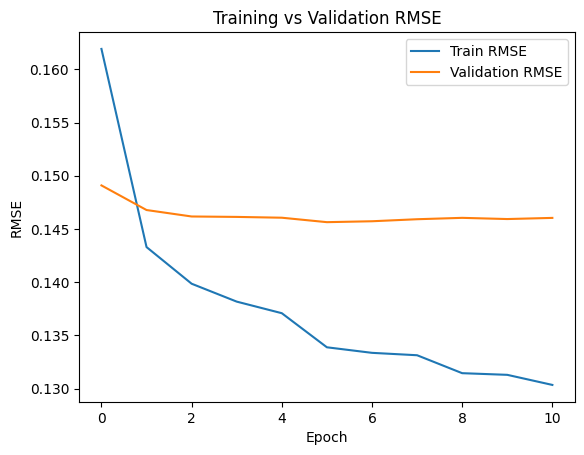

In [40]:
import matplotlib.pyplot as plt

plt.plot(history.history['root_mean_squared_error'], label='Train RMSE')
plt.plot(history.history['val_root_mean_squared_error'], label='Validation RMSE')
plt.legend()
plt.title('Training vs Validation RMSE')
plt.xlabel('Epoch')
plt.ylabel('RMSE')
plt.show()

In [41]:
# Salin data anime
anime_copy = anime.copy()
df = anime_rating[['user_id', 'anime_id', 'rating_x']]

# Pilih 1 user secara acak
user_id = df.user_id.sample(1).iloc[0]
anime_rated_by_user = df[df.user_id == user_id]

# Ambil anime yang belum ditonton oleh user tersebut
anime_not_watched = anime_copy[~anime_copy['anime_id'].isin(anime_rated_by_user.anime_id.values)]['anime_id']
anime_not_watched = list(
    set(anime_not_watched)
    .intersection(set(anime_to_encoded.keys()))
)

encoded_to_anime = {v: k for k, v in anime_to_encoded.items()}


# Siapkan data untuk prediksi
anime_not_watched_encoded = [[anime_to_encoded.get(x)] for x in anime_not_watched]
user_encoded = user_to_encoded.get(user_id)
user_anime_array = np.hstack(
    ([[user_encoded]] * len(anime_not_watched_encoded), anime_not_watched_encoded)
)

# Prediksi rating
ratings = model.predict(user_anime_array).flatten()

# Ambil 10 rekomendasi terbaik
top_ratings_indices = ratings.argsort()[-10:][::-1]
recommended_anime_ids = [
    encoded_to_anime.get(anime_not_watched_encoded[x][0]) for x in top_ratings_indices
]

# --- TAMPILKAN HASILNYA ---
print('Showing recommendations for user ID:', user_id)
print('=' * 30)

print('\nAnime with high ratings from this user')
print('-' * 30)

top_anime_user = (
    anime_rated_by_user.sort_values(
        by='rating_x',
        ascending=False
    ).head(5).anime_id.values
)

anime_df_rows = anime_copy[anime_copy['anime_id'].isin(top_anime_user)]
for row in anime_df_rows.itertuples():
    print(f"{row.name} | Genre: {row.genre if hasattr(row, 'genre') else 'N/A'}")

print('-' * 30)
print('Top 10 Anime Recommendations')
print('-' * 30)

recommended_anime = anime_copy[anime_copy['anime_id'].isin(recommended_anime_ids)]
for row in recommended_anime.itertuples():
    print(f"{row.name} | Genre: {row.genre if hasattr(row, 'genre') else 'N/A'}")

306/306 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Showing recommendations for user ID: 6113

Anime with high ratings from this user
------------------------------
Macross: Do You Remember Love? | Genre: Action, Mecha, Military, Music, Romance, Sci-Fi, Space
Change!! Getter Robo: Sekai Saigo no Hi | Genre: Action, Adventure, Horror, Mecha, Psychological, Sci-Fi, Shounen
Gaiking: Legend of Daiku-Maryu | Genre: Action, Mecha, Sci-Fi
Kikou Senki Dragonar | Genre: Adventure, Mecha, Sci-Fi, Shounen, Space
Choujuushin Gravion | Genre: Action, Comedy, Mecha, Sci-Fi, Shounen
------------------------------
Top 10 Anime Recommendations
------------------------------
Kimi no Na wa. | Genre: Drama, Romance, School, Supernatural
Gintama° | Genre: Action, Comedy, Historical, Parody, Samurai, Sci-Fi, Shounen
Steins;Gate | Genre: Sci-Fi, Thriller
Ginga Eiyuu Densetsu | Genre: Drama, Military, Sci-Fi, Space
Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare | Genre: Action, Comedy, Historical, Parody, Samurai, 